In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv('../Dataset/dataset.csv', encoding=('ISO-8859-1'))

In [3]:
df.head()

,Updated at,Company,Crunchbase Url,Last Valuation (Billion $),Date Joined,Year Joined,City,Country,Industry,Investors,Company Website
0,"10/31/2022, 2:37:05 AM",Esusu,https://www.cbinsights.com/company/esusu,1.0,1/27/2022,2022,New York,United States,Fintech,"[""Next Play Ventures"",""Zeal Capital Partners"",...",NaN
1,"10/31/2022, 2:37:05 AM",Fever Labs,https://www.cbinsights.com/company/fever-labs,1.0,1/26/2022,2022,New York,United States,Internet software & services,"[""Accel"",""14W"",""GS Growth""]",NaN
2,"10/31/2022, 2:37:04 AM",Minio,https://www.cbinsights.com/company/minio,1.0,1/26/2022,2022,Palo Alto,United States,Data management & analytics,"[""General Catalyst"",""Nexus Venture Partners"",""...",NaN
3,"10/31/2022, 2:37:04 AM",Darwinbox,https://www.cbinsights.com/company/darwinbox,1.0,1/25/2022,2022,Hyderabad,India,Internet software & services,"[""Lightspeed India Partners"",""Sequoia Capital ...",NaN
4,"10/31/2022, 2:37:04 AM",Pentera,https://www.cbinsights.com/company/pcysys,1.0,1/11/2022,2022,Petah Tikva,Israel,Cybersecurity,"[""AWZ Ventures"",""Blackstone"",""Insight Partners""]",NaN


In [4]:
df.shape

(1199, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Updated at                  1199 non-null   object 
 1   Company                     1199 non-null   object 
 2   Crunchbase Url              1199 non-null   object 
 3   Last Valuation (Billion $)  1199 non-null   float64
 4   Date Joined                 1199 non-null   object 
 5   Year Joined                 1199 non-null   int64  
 6   City                        1181 non-null   object 
 7   Country                     1199 non-null   object 
 8   Industry                    1199 non-null   object 
 9   Investors                   1199 non-null   object 
 10  Company Website             0 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 103.2+ KB


In [6]:
df.columns

Index(['Updated at', 'Company', 'Crunchbase Url', 'Last Valuation (Billion $)',
       'Date Joined', 'Year Joined', 'City', 'Country', 'Industry',
       'Investors', 'Company Website'],
      dtype='object')

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Last Valuation (Billion $),1199.0,3.225588,7.601195,1.0,1.1,1.57,3.0,140.0
Year Joined,1199.0,2020.158465,1.981949,2007.0,2019.0,2021.00,2021.0,2022.0
Company Website,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.select_dtypes(include='int64').nunique()

Year Joined    13
dtype: int64

In [9]:
df.select_dtypes(include='object').nunique()

Updated at         279
Company           1196
Crunchbase Url    1195
Date Joined        708
City               282
Country             49
Industry            20
Investors         1183
dtype: int64

<Axes: >

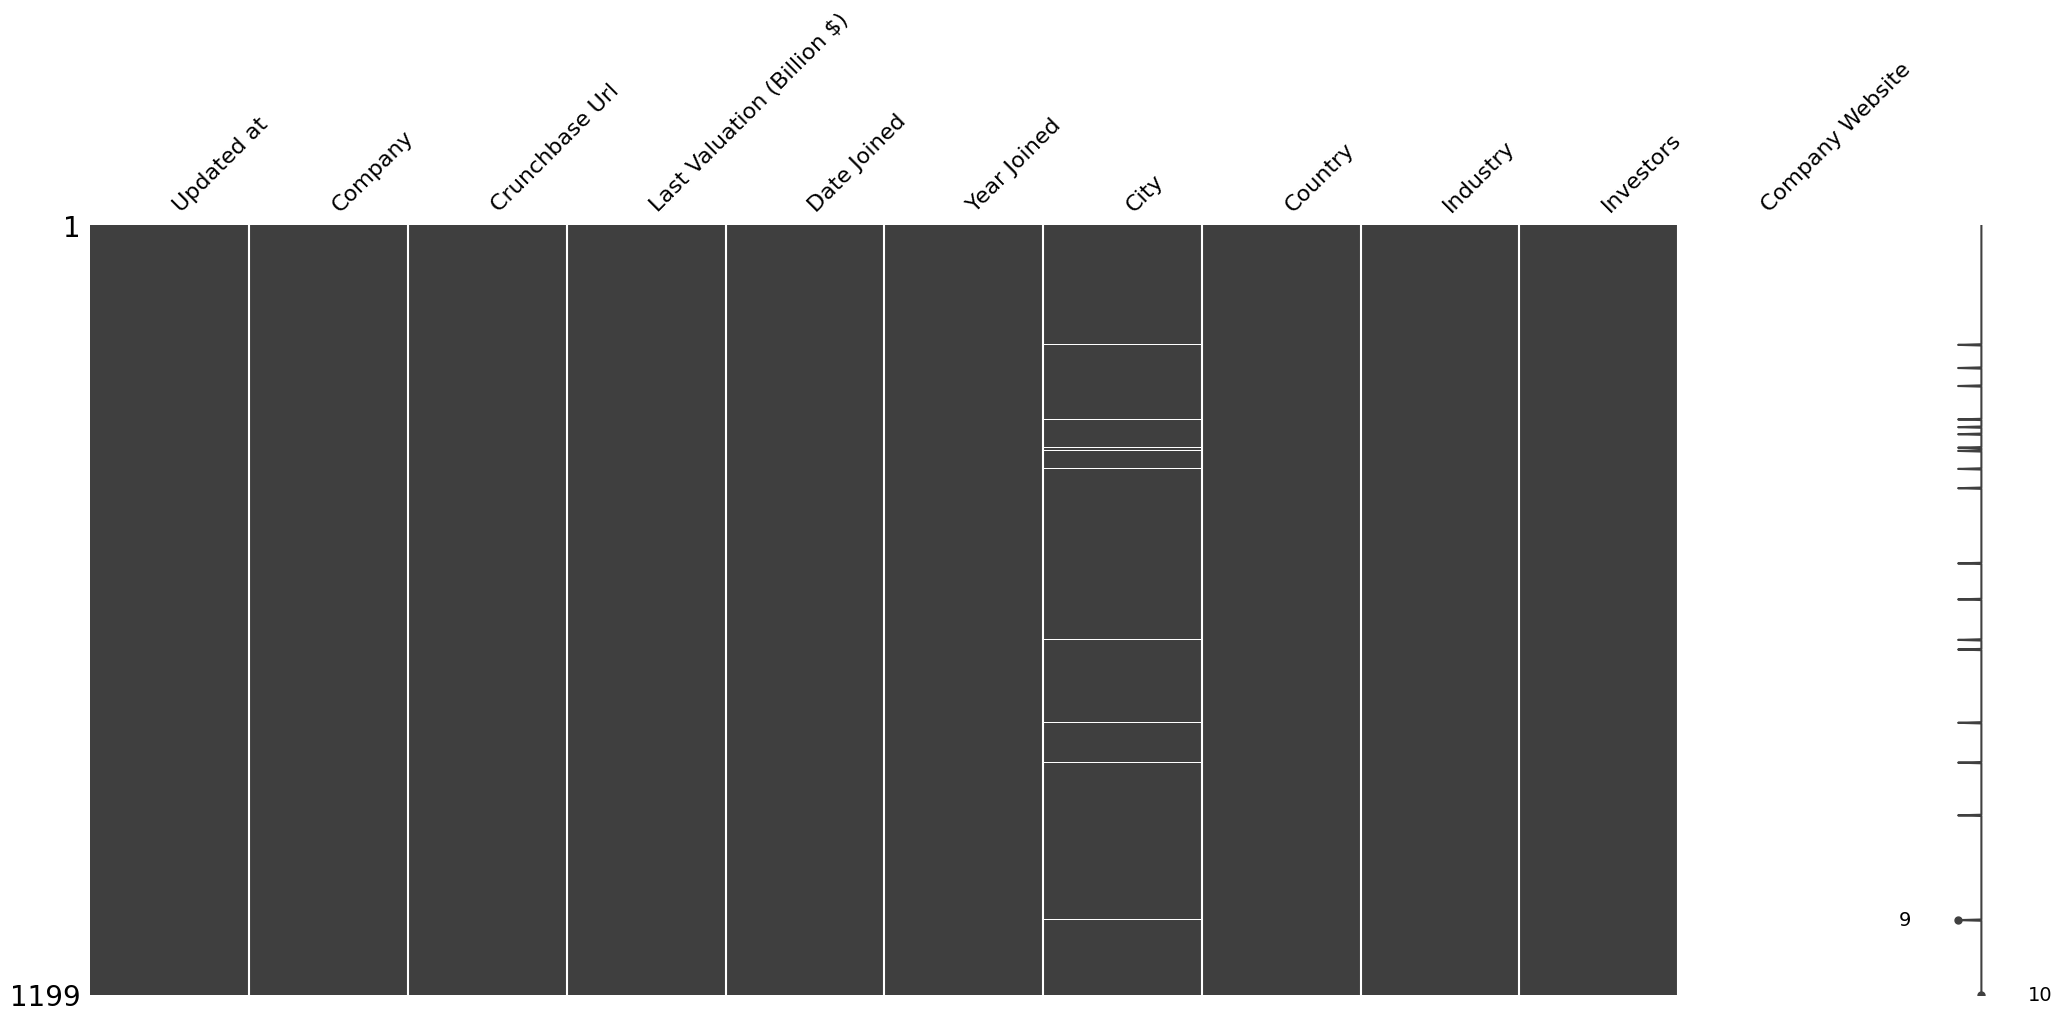

In [10]:
msno.matrix(df)

We can observe that, some city names are missing.

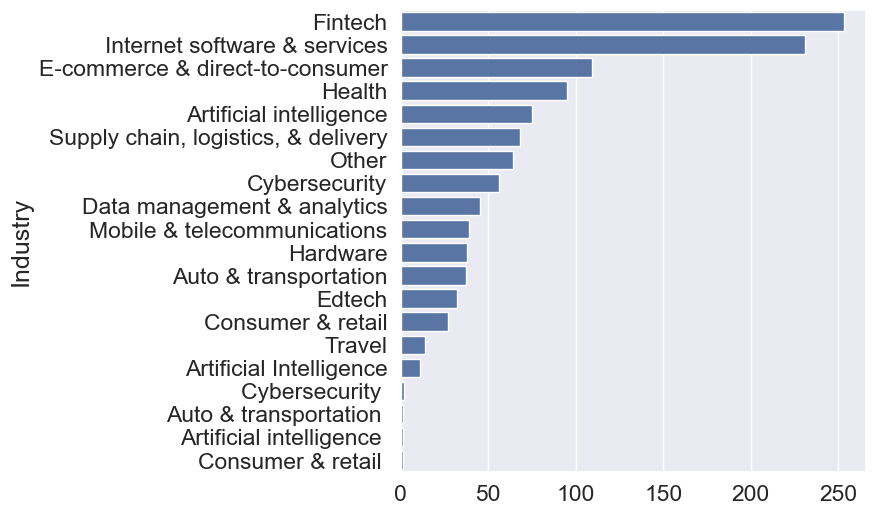

In [11]:
industry_counts = df['Industry'].value_counts()
sns.set(font_scale=1.5, rc={'figure.figsize':(6,6)})

sns.barplot(x=industry_counts.values, y=industry_counts.index,orient='h')

plt.xlabel=('Industry')
plt.ylabel=('Count')
plt.title="Number of Observations by Industry"

plt.show()

Fintech seems to be the leading industry

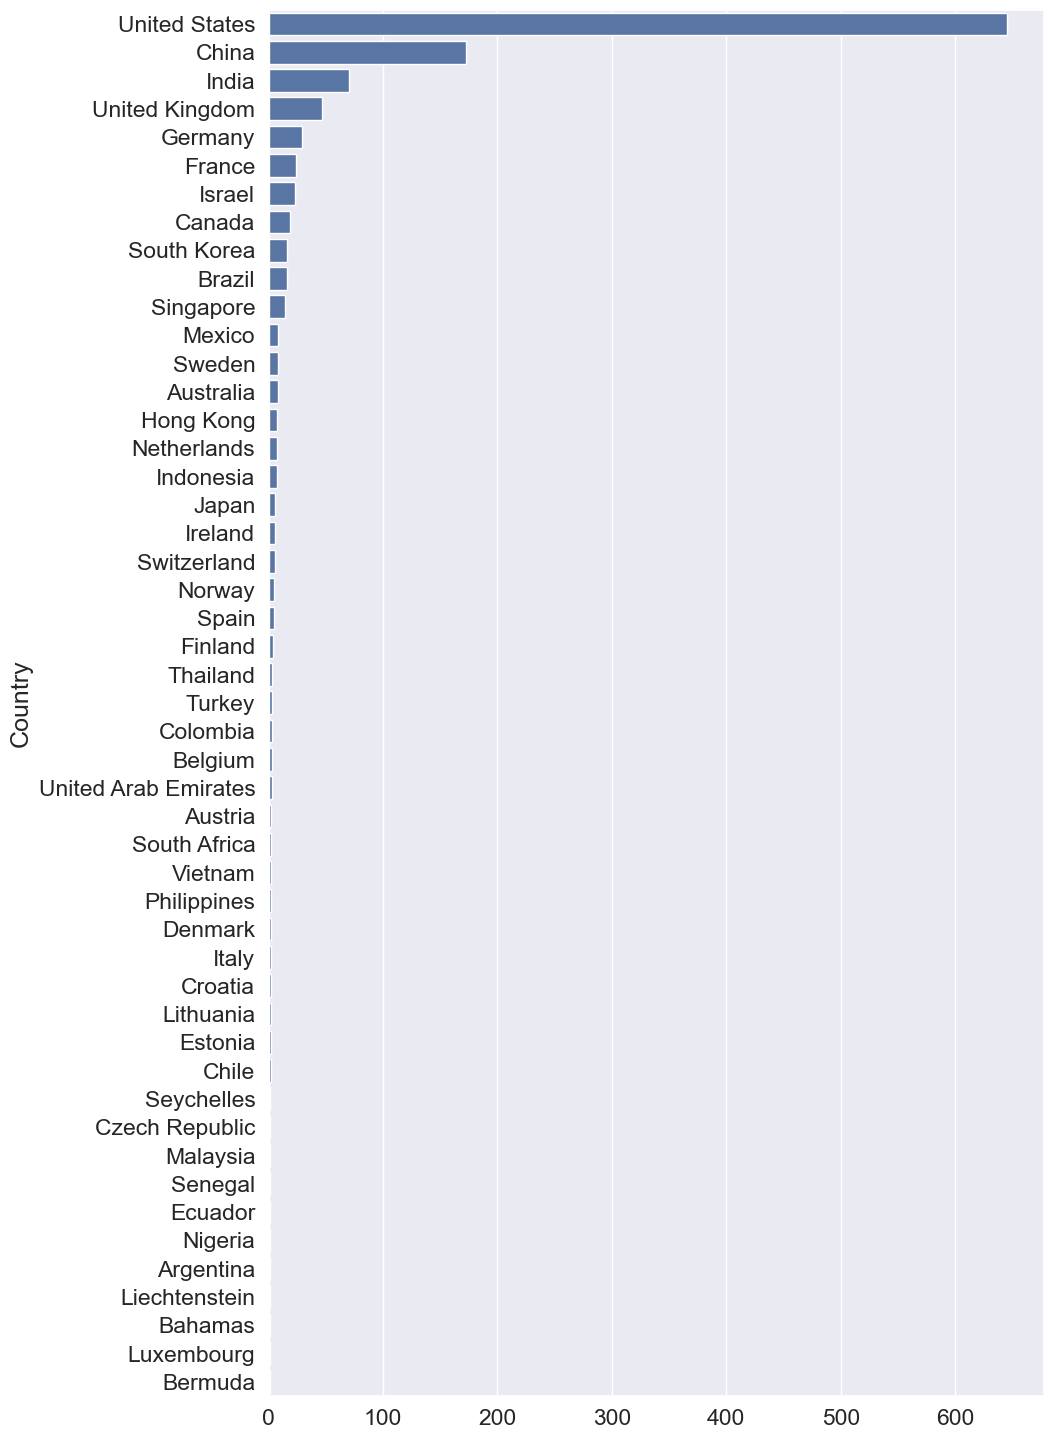

In [12]:
country_counts = df['Country'].value_counts()
sns.set(font_scale=1.5, rc={'figure.figsize':(10,18)})

sns.barplot(x=country_counts.values, y=country_counts.index,orient='h')

plt.xlabel=('Country')
plt.ylabel=('Count')
plt.title="Number of Observations by Industry"

plt.show()

US seems to be the leading country.

In [13]:
def industrys_and_country(state):
    data_ind=df.loc[df.Country.isin([state])]
    data_ind.Industry.value_counts().plot(kind='bar',title=state)

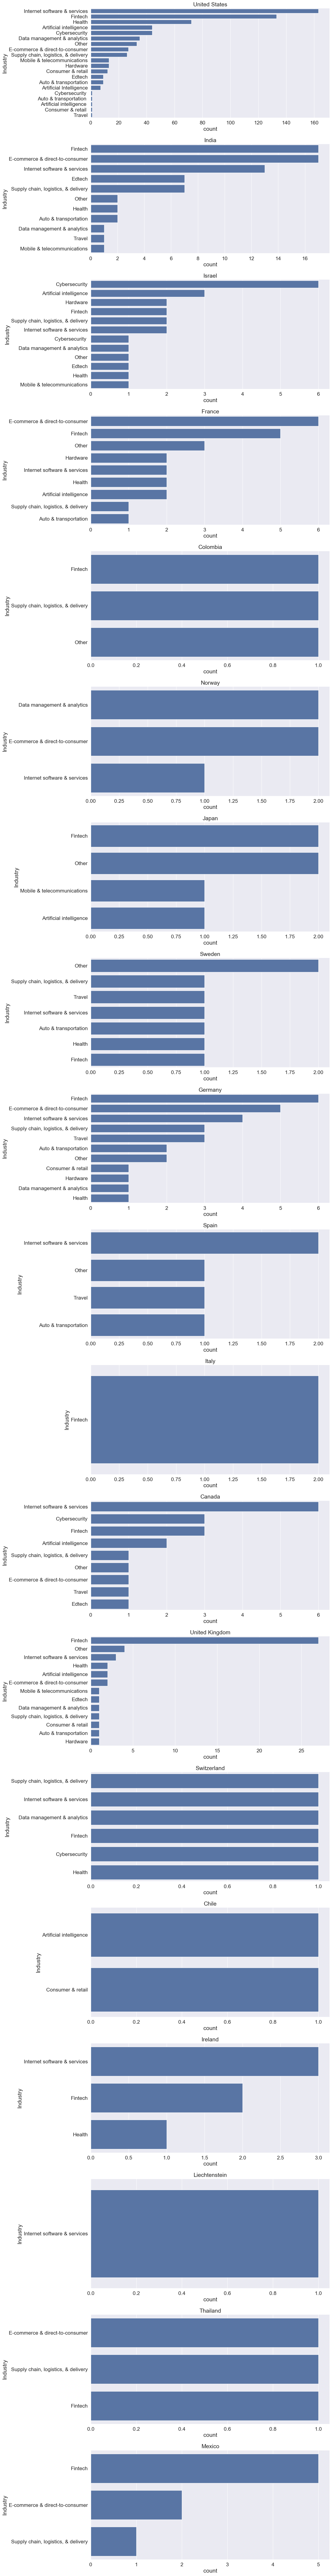

In [14]:
col=['United States', 'India', 'Israel', 'France', 'Colombia', 'Norway', 'Japan', 'Sweden', 'Germany', 'Spain', 'Italy', 'Canada', 'United Kingdom', 'Switzerland', 'Chile', 'Ireland', 'Liechtenstein', 'Thailand', 'Mexico']

fig, axs = plt.subplots(len(col), 1, figsize=(15, 6 * len(col)))

for i, ax in enumerate(axs):
    df_ind = df.loc[df.Country.isin([col[i]])]
    sns.countplot(y=df_ind["Industry"], data=df_ind, ax=ax, order=df_ind["Industry"].value_counts().index)
    ax.set_title(col[i])

plt.tight_layout()
plt.show()

Country wise leading industries

<Axes: ylabel='Year Joined'>

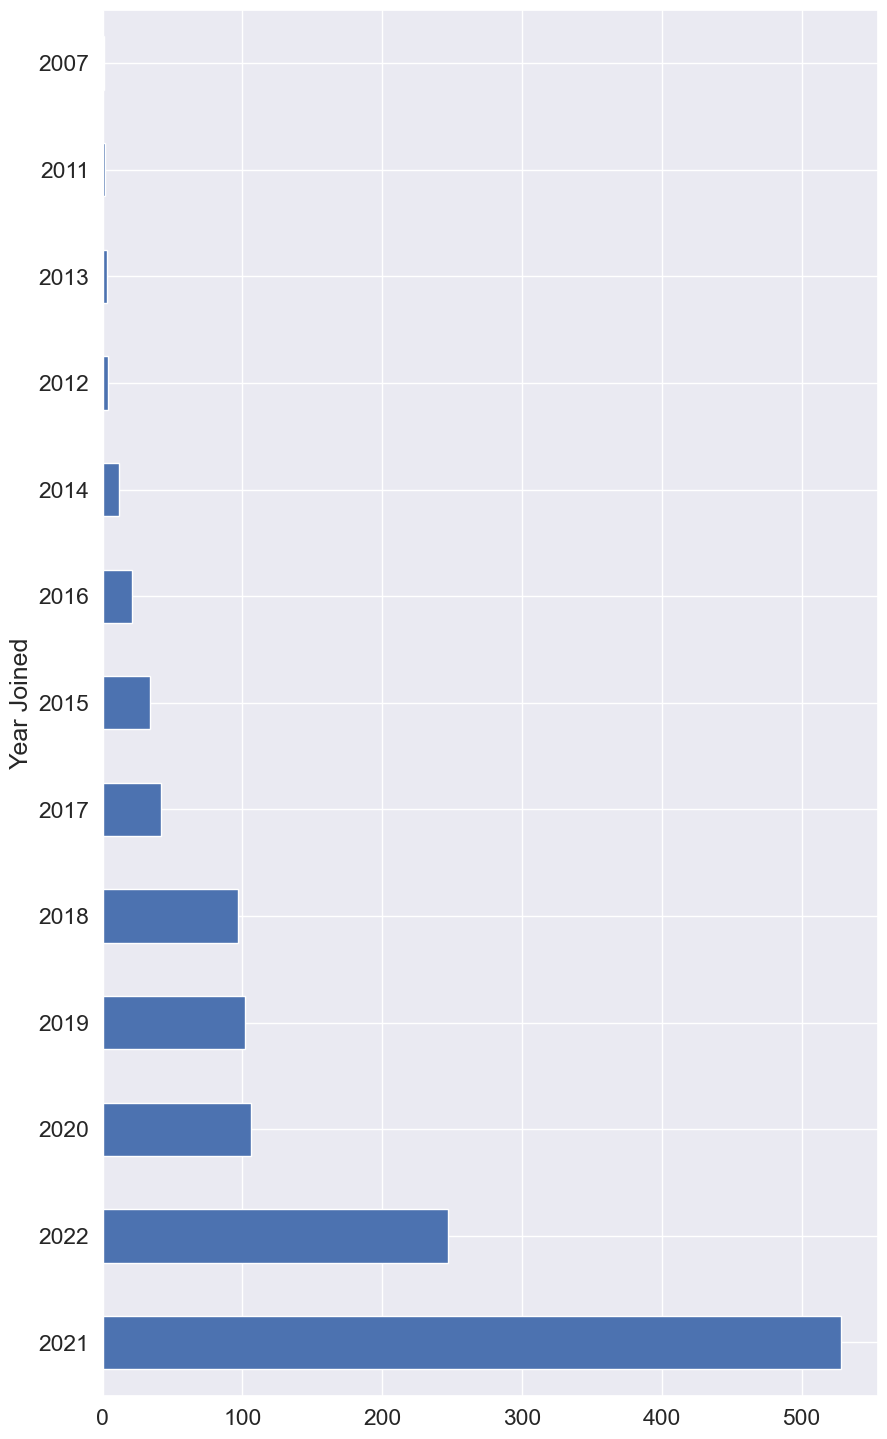

In [15]:
df['Year Joined'].value_counts().plot(kind='barh')

Startups have been on the rise in recent years.

# India

Industry
Fintech                                17
E-commerce & direct-to-consumer        17
Internet software & services           13
Edtech                                  7
Supply chain, logistics, & delivery     7
Other                                   2
Health                                  2
Auto & transportation                   2
Data management & analytics             1
Travel                                  1
Mobile & telecommunications             1
Name: count, dtype: int64

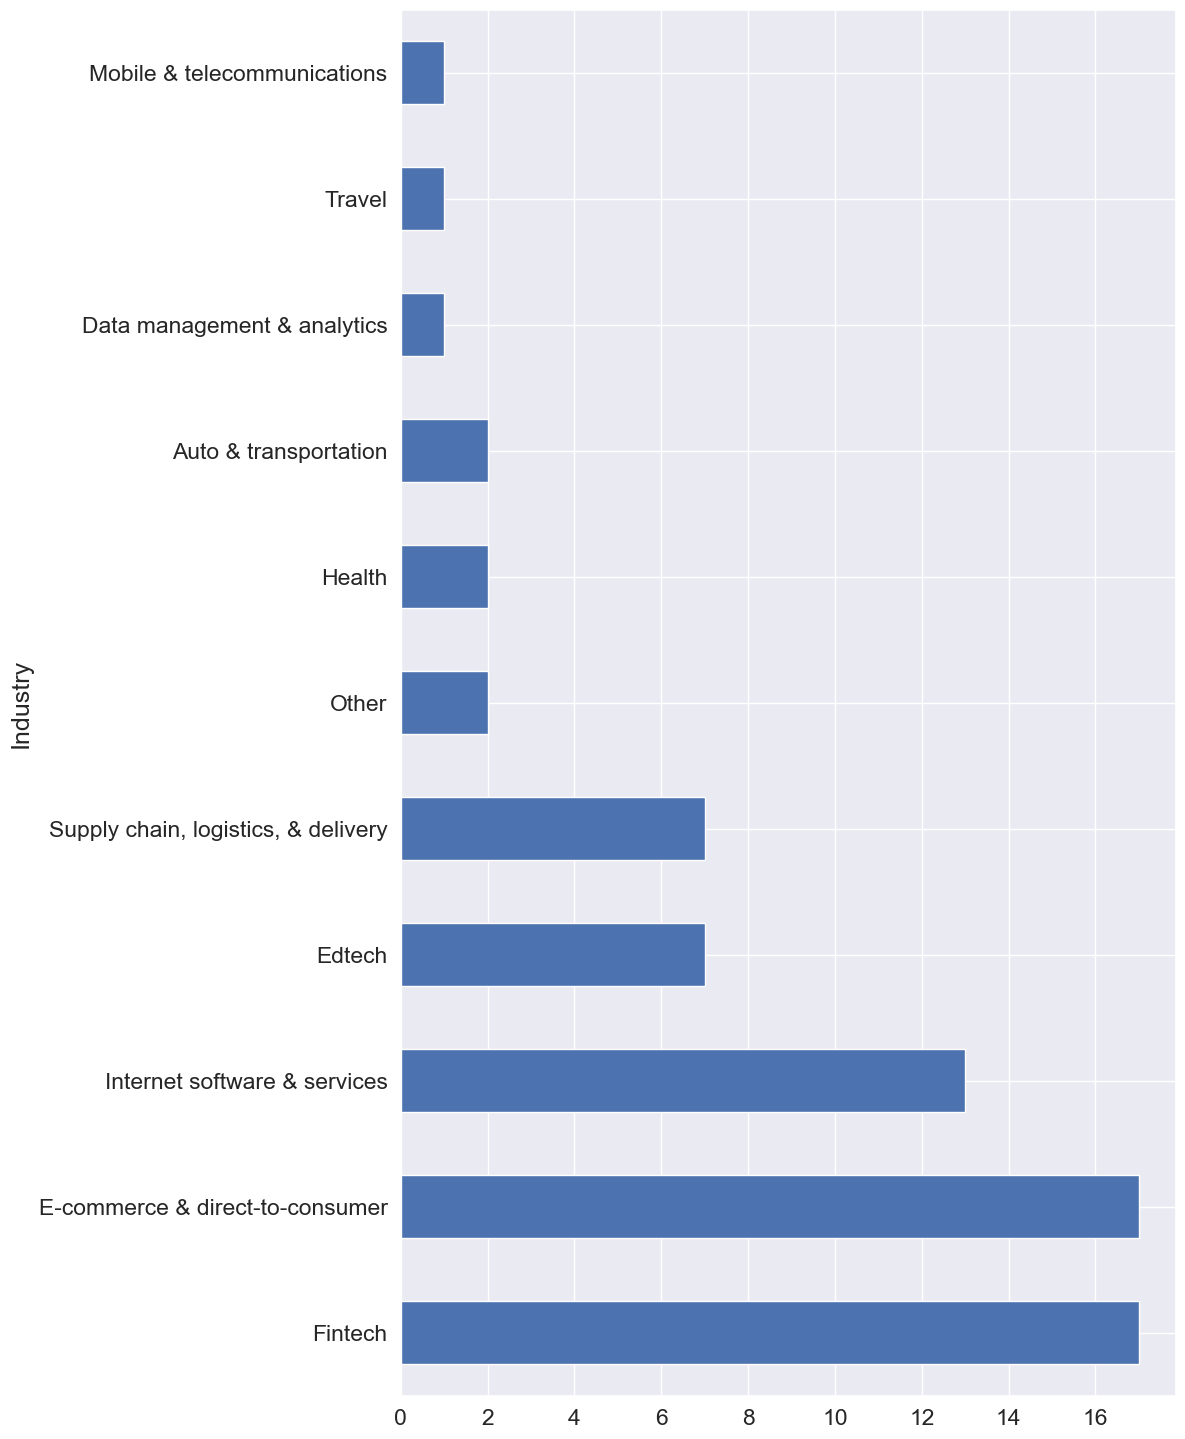

In [16]:
df_ind=df.loc[df.Country.isin(['India'])]
df_ind.Industry.value_counts().plot(kind='barh')
df_ind['Industry'].value_counts()

Leading industries in India

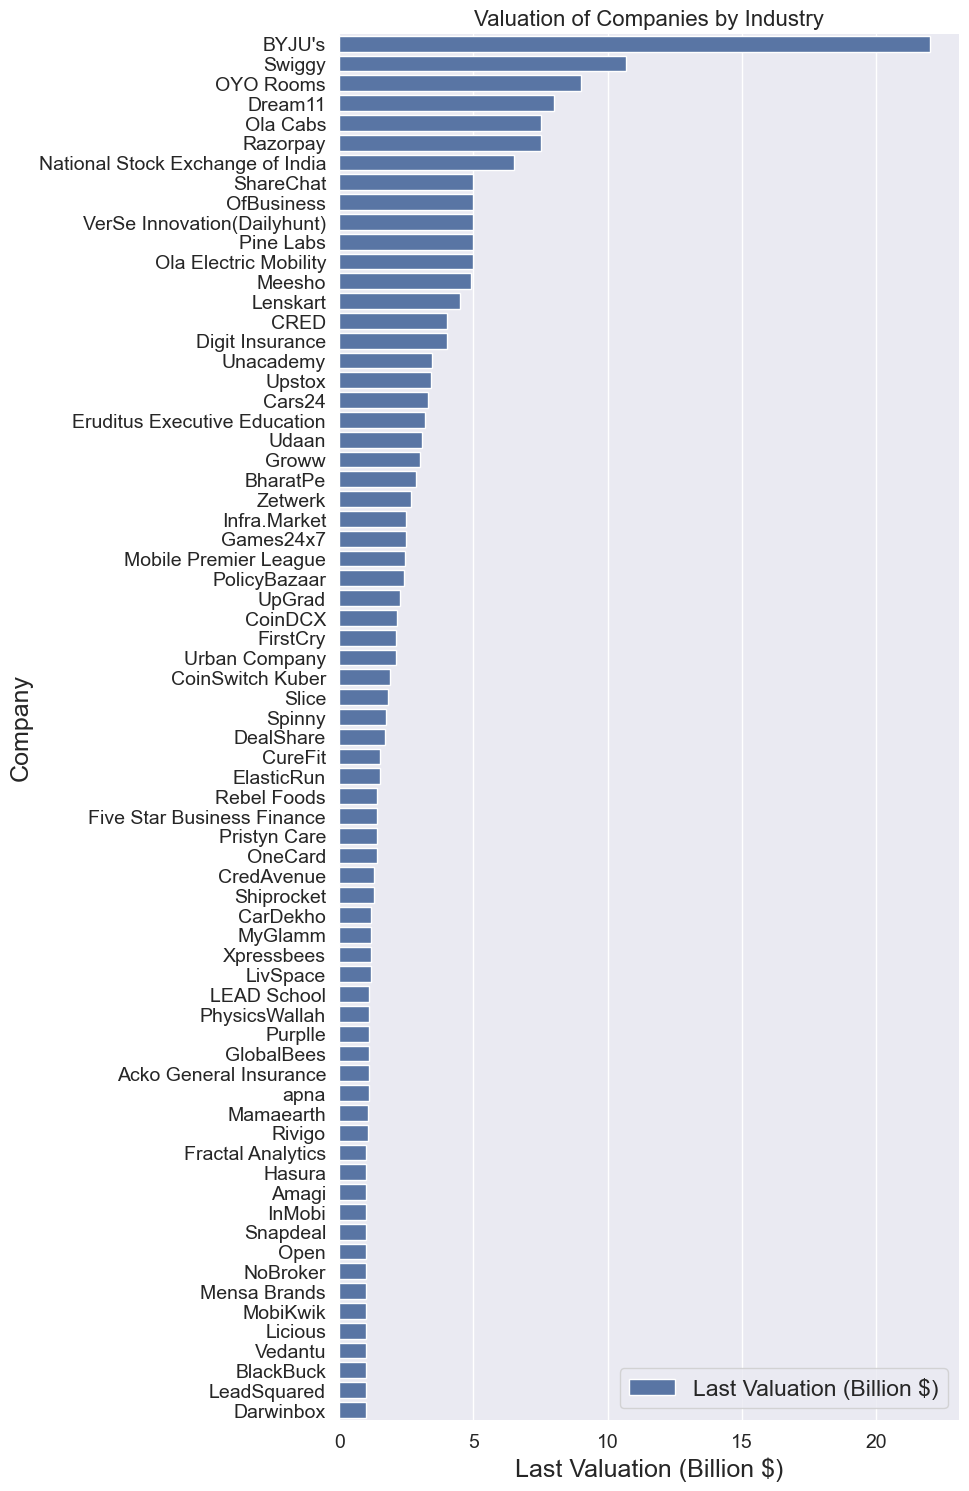

In [17]:
ind_sorted_df = df_ind.sort_values("Last Valuation (Billion $)", ascending=False)

f, ax = plt.subplots(figsize=(8, 18))

sns.barplot(x="Last Valuation (Billion $)", y="Company", data=ind_sorted_df,
            label="Last Valuation (Billion $)")

ax.tick_params(axis='both', which='major', labelsize=14)

ax.set_title("Valuation of Companies by Industry", fontsize=16)

sns.despine(left=True, bottom=True)
plt.show()

BYJU's has the highest valuation.

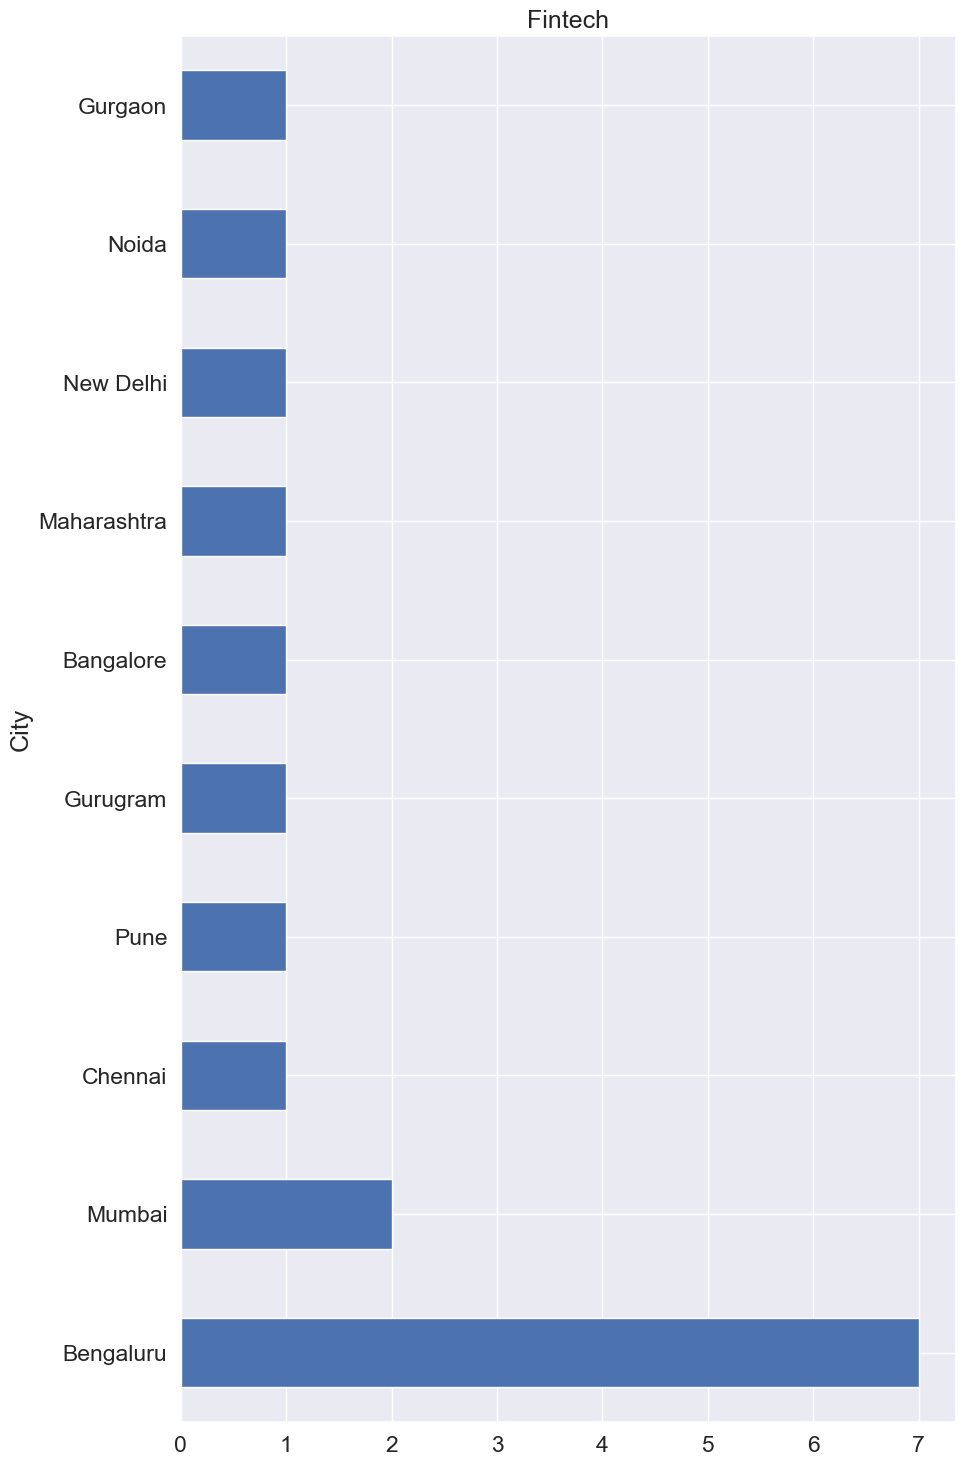

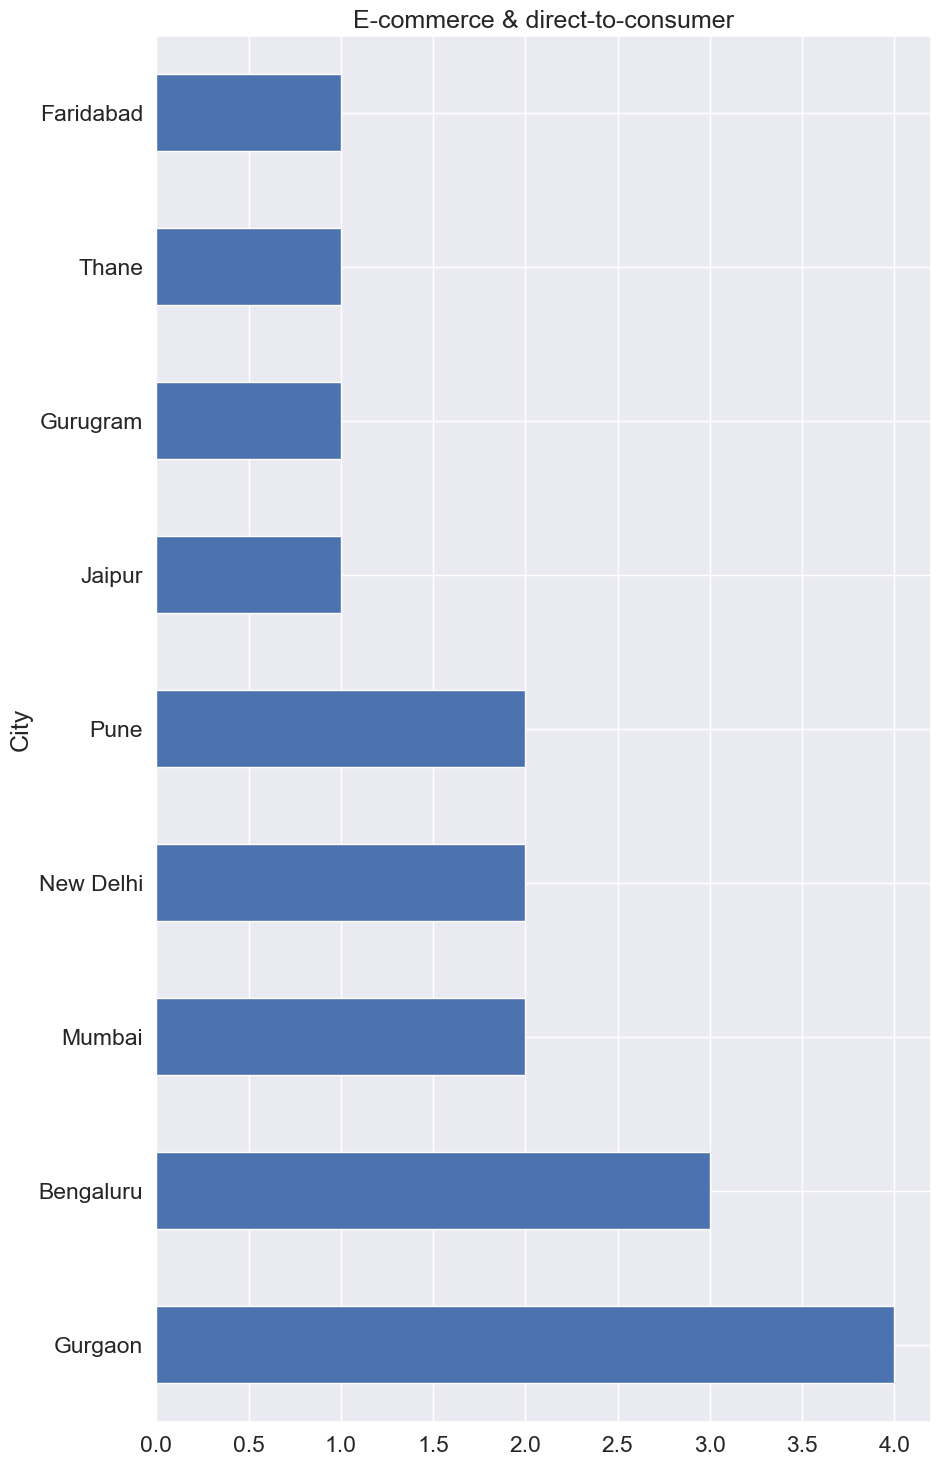

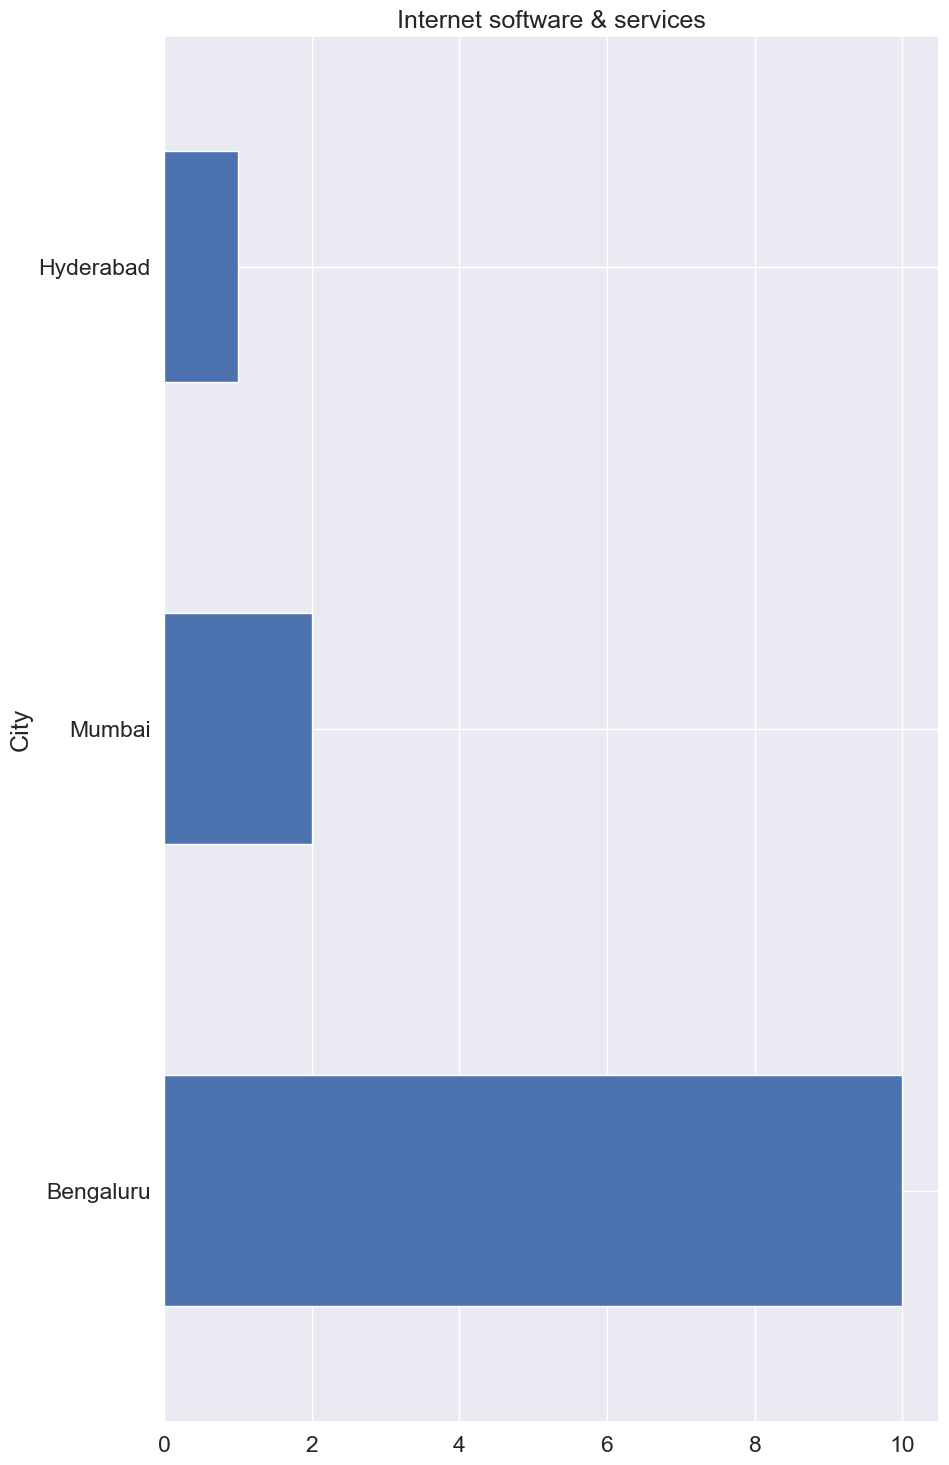

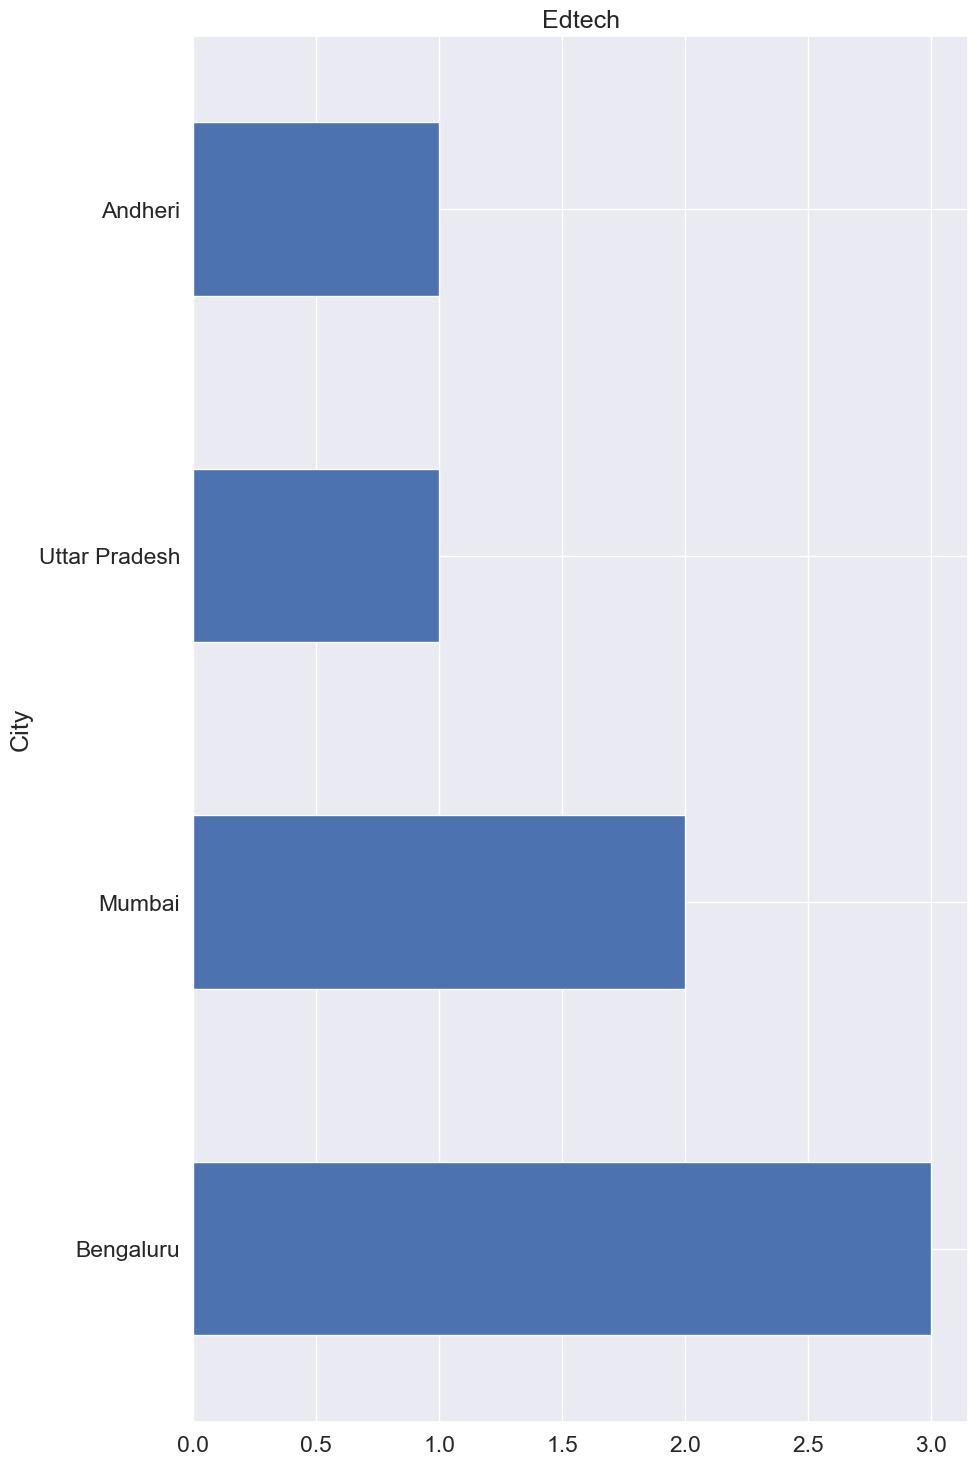

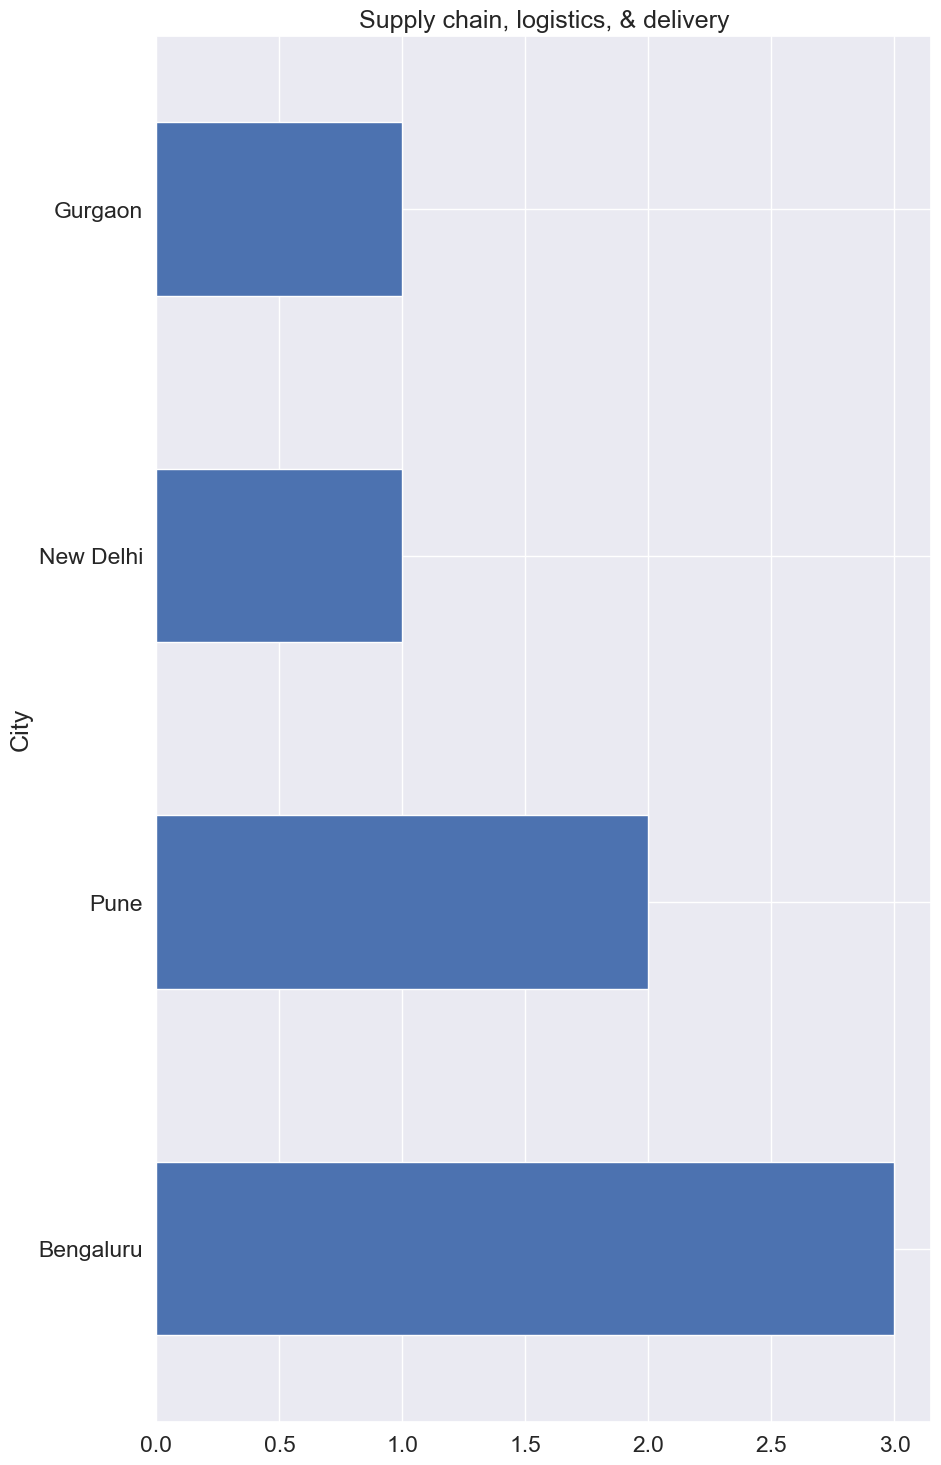

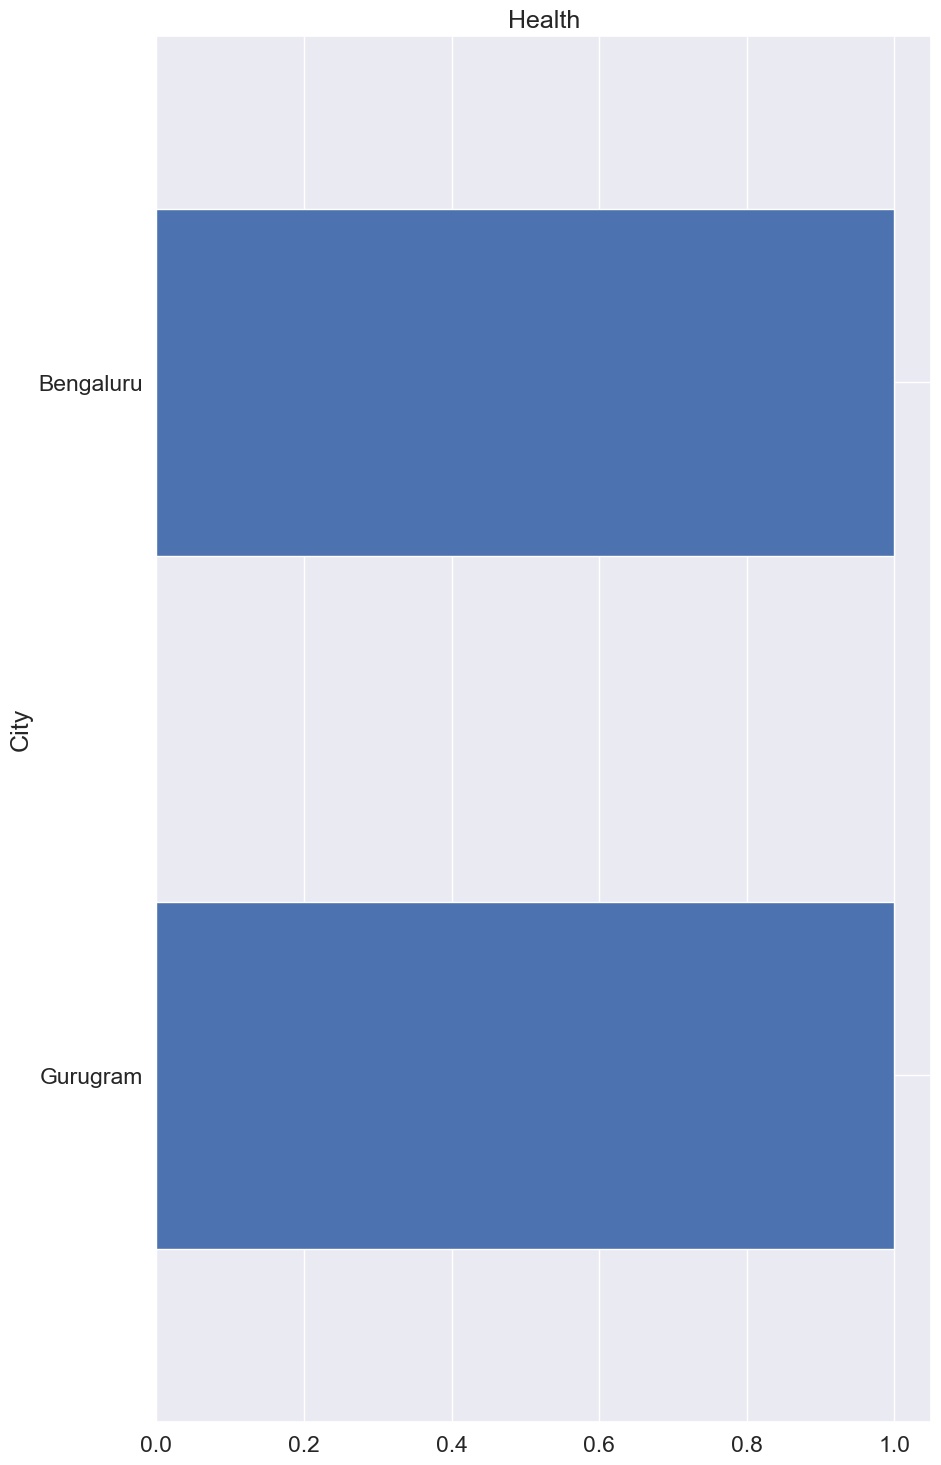

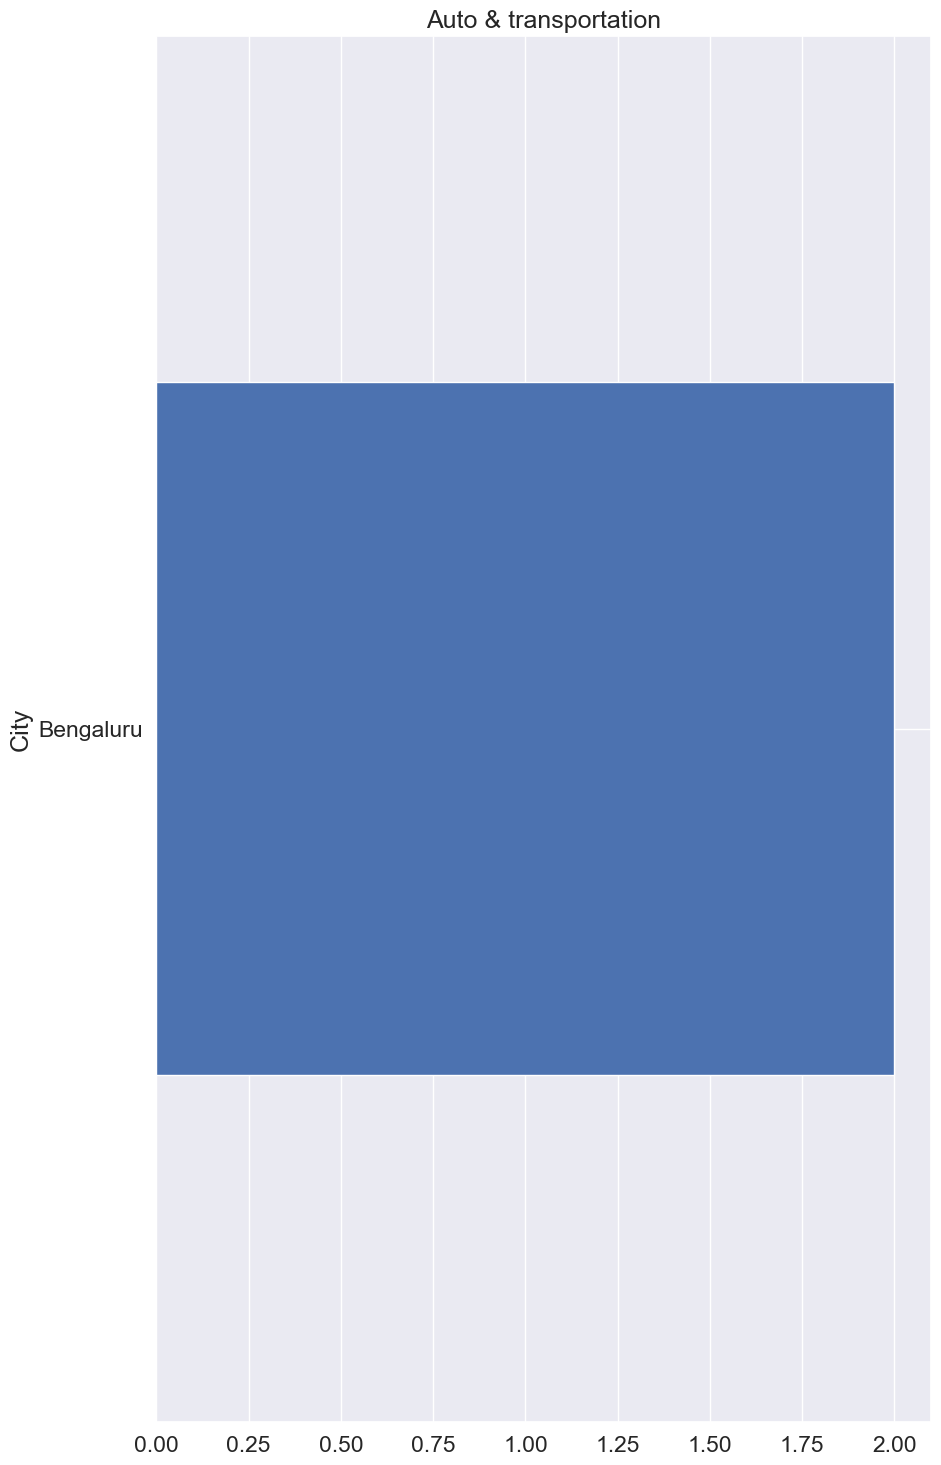

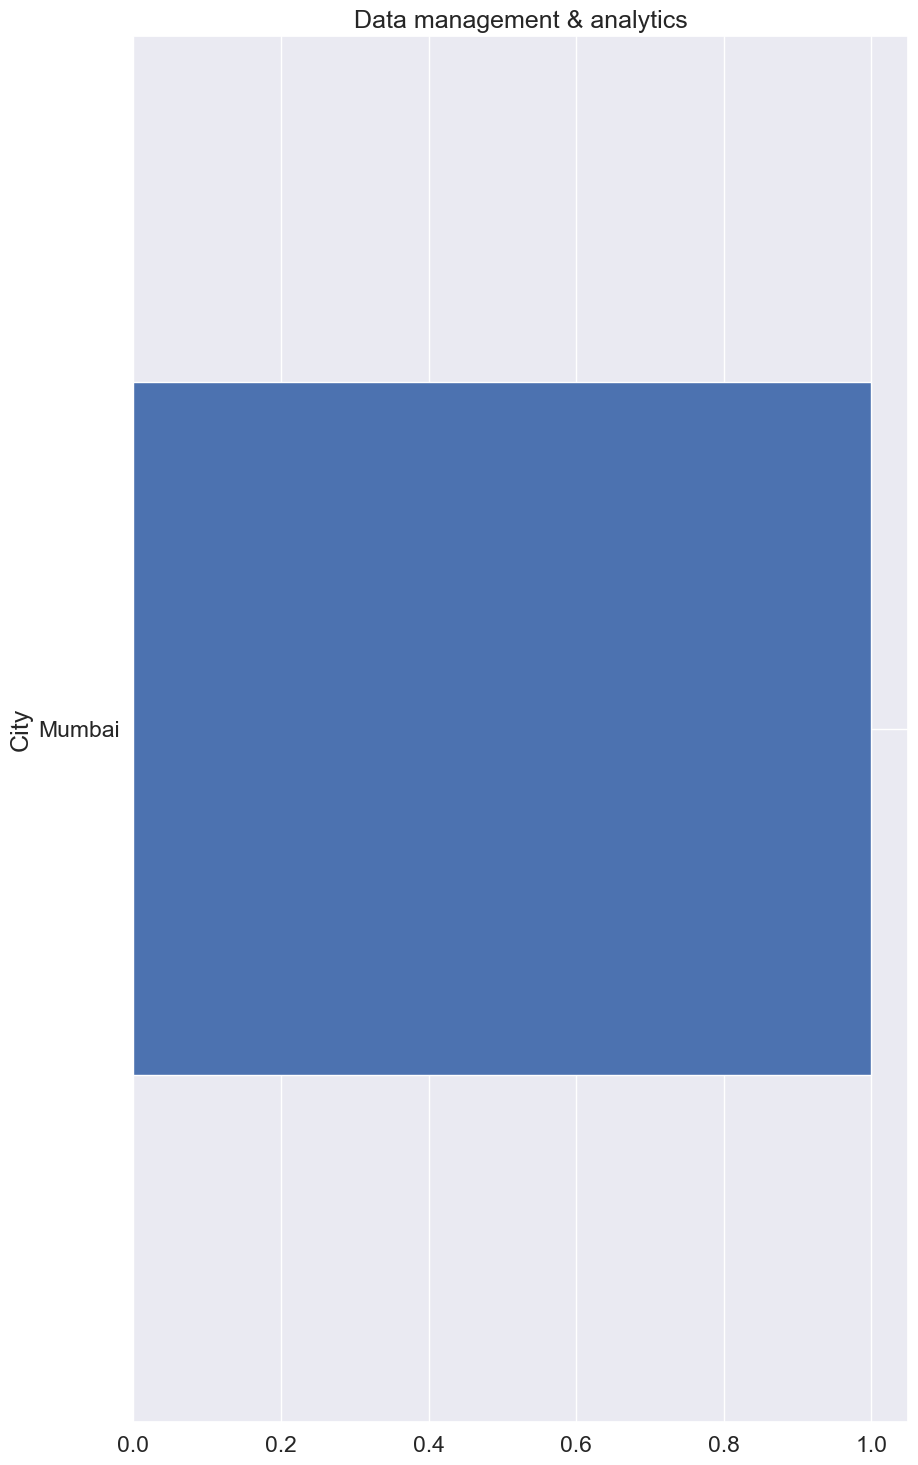

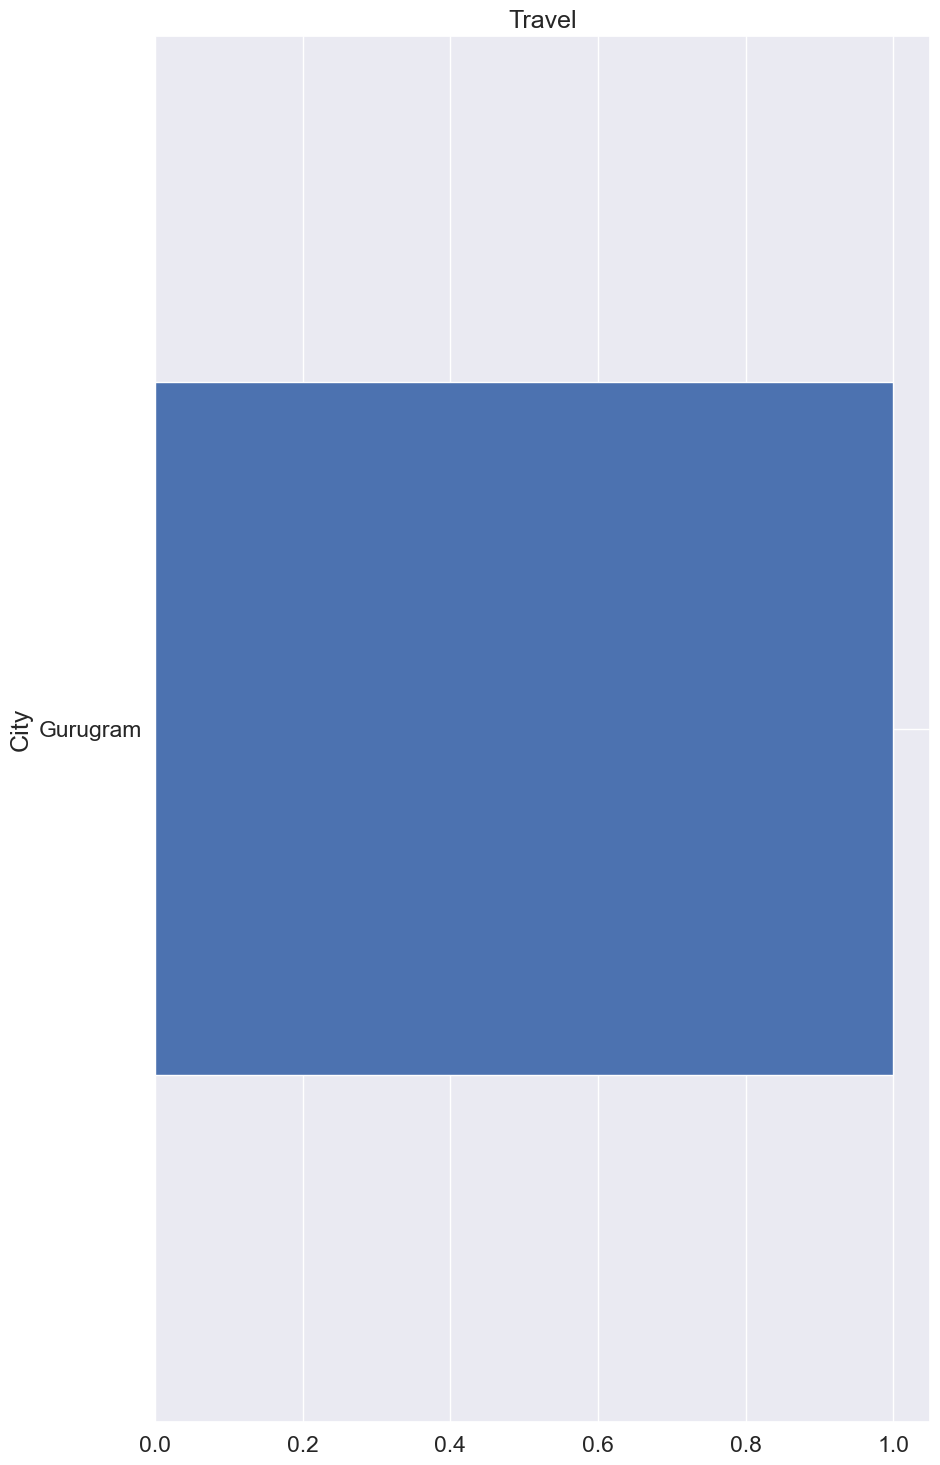

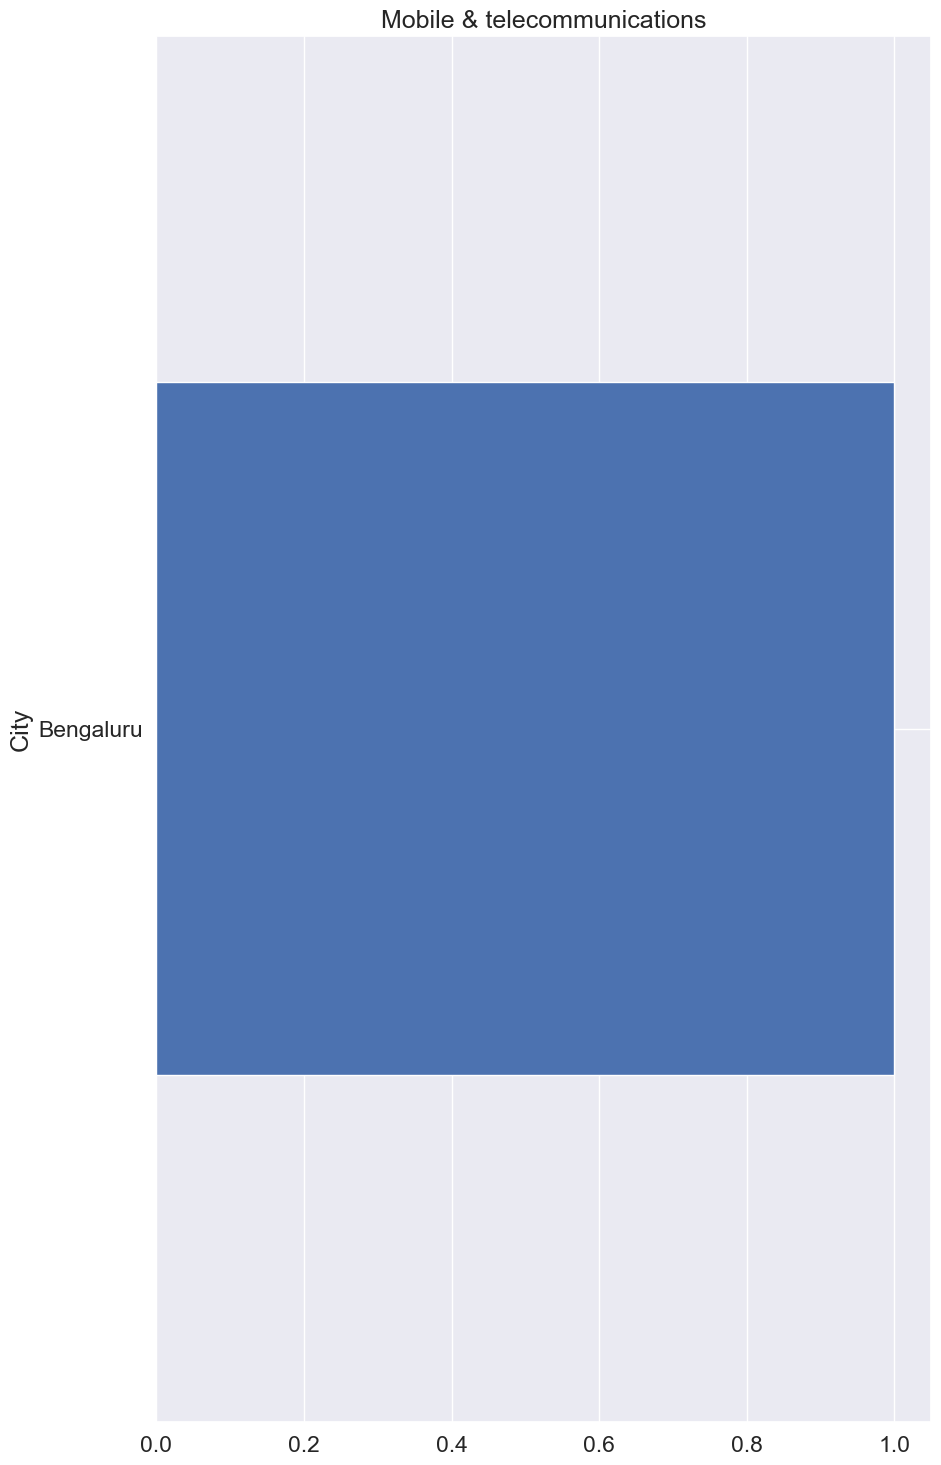

In [18]:
ind=['Fintech','E-commerce & direct-to-consumer','Internet software & services',
    'Edtech','Supply chain, logistics, & delivery','Health','Auto & transportation',
    'Data management & analytics','Travel','Mobile & telecommunications']
for i in  ind:
    ind_fin_df=df.loc[df.Country.isin(['India'])]
    fin_df=ind_fin_df.loc[df['Industry'] == i]

    fin_df['City'].value_counts().plot(kind='barh',title=i)
    plt.show()

City wise leading industries